Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*Elena*</p>| <p style="text-align: left">*Handorfer*</p> | *k01556409* |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Navid Rekab-saz, Oleg Lesota<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

In [1]:
# import libraries
import os
import glob
import re
import itertools
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import MWETokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from collections import Counter

In [2]:
# helper functions

# function to split the data into text and labels
def split_into_texts_and_labels(data):
    labels = []
    texts = data.split('\n')
    texts = [text for text in texts if len(text)>0]
    for i, text in enumerate(texts):
        try:
            nr = int(text[-1])
            labels.append(text[-1])
            texts[i] = ''.join(list(text)[:-2])
        except:
            break
    return texts, labels


# apply some basic preprocessing methods
# such as replacing all the dates and numbers with a special token 
# and removing special characters
def perform_basic_preprocessing(text):
    text = text.lower()

    # replace the dates with <date>
    for d in re.finditer('\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', text):
        text = text.replace(str(d.group()), '<date>')

    for d in re.finditer(r'(\d{1,2}[\s]?|\d{1,2}[\s]?th[\s]?)?(?:january|february|march|april|may|june|july|august|september|october|november|december|jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)[\s-]?(\d{1,2})?[,\s-]?[\s]?\d{4}', text, re.I|re.M):
        text = text.replace(str(d.group()), '<date>')

    for d in re.finditer(r'(\d{1,2}|\d{1,2}[\s]?th)[\s]?(?:january|february|march|april|may|june|july|august|september|october|november|december|jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)', text, re.I|re.M):  
        text = text.replace(str(d.group()), '<date>')

    for d in re.finditer(r'\d{1,2}[/-]\d{4}', text, re.M|re.I):
        text = text.replace(str(d.group()), '<date>')
        
    # replace the remaining numbers with <num>
    text = re.sub('[0-9]*[[,.]?[0-9]+]*', '<num>', text)
    
    # remove all special characters besides <>
    text = re.sub('([^a-z<>])+', ' ', text)

    return text

# split the text into single tokens
def perform_tokenization(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # define tokenizer for special tokens
    tokenizer = MWETokenizer([('<', 'num', '>'), ('<', 'date', '>')])
    tokens = tokenizer.tokenize(nltk.word_tokenize(text))
    
    # remove stop words
    tokens = [token for token in tokens if not token in stop_words]
    # perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# compute document frequency
def compute_df(word_dict, tokens_per_text):
    df = {} 
    for token in word_dict:
        for token_list in tokens_per_text:
            if token in token_list:
                # count the number of times the token appears accross documents
                try:
                    df[token] += 1
                except:
                    df[token] = 1
    return df

# compute term frequency
def compute_tf(word_dict, tokens_per_text):
    tf_per_text = []
    for token_list in tokens_per_text:
        tf = {}
        for token in word_dict:
            tf[token] = ' '.join(token_list).count(token)
        tf_per_text.append(tf)
    return tf_per_text

# compute 'tf-idf'-representation vectors 
def compute_tf_idf_mtr(word_dict, tokens_per_text):
    df = compute_df(word_dict, tokens_per_text)
    tf_per_text = compute_tf(word_dict, tokens_per_text)
    
    tf_idf_per_text = []
    for tf in tf_per_text:
        tf_idf = {}
        for token, freq in tf.items():
            tf_idf[token] = np.log(1+freq) * np.log(len(tf_per_text)/(df[token]+1))
        tf_idf_per_text.append(tf_idf)

    # document X word matrix
    tf_idf_df = pd.DataFrame(tf_idf_per_text.copy())
    return tf_idf_df.to_numpy()

# TODO MAKE A CHOICE BETWEEN ONE OF THE TWO-use the first one for now...
# compute bm25 representation vectors
def compute_bm25_mtr(word_dict, tokens_per_text, train_texts):
    df = compute_df(word_dict, tokens_per_text)
    tf_per_text = compute_tf(word_dict, tokens_per_text)
    
    b = 0.75
    k1 = 1.2
    avgdl = sum([len(text) for text in train_texts])/(len(train_texts))
    d = [len(text) for text in train_texts]
    bm25_per_text = []
    for i, tf in enumerate(tf_per_text):
        bm25 = {}
        for token, freq in tf.items():
            bm25[token] = (((k1+1)*freq) / ((k1*(1-b+b*(d[i]/avgdl))) + freq)) * np.log(len(tf_per_text)/(df[token]+1))
        bm25_per_text.append(bm25)

    bm25_df = pd.DataFrame(bm25_per_text.copy())
    return bm25_df.to_numpy()

# use the list of tokens and not the length of the texts as avgdl
def compute_bm25_mtr_other(word_dict, tokens_per_text, train_texts):
    df = compute_df(word_dict, tokens_per_text)
    tf_per_text = compute_tf(word_dict, tokens_per_text)
    
    b = 0.75
    k1 = 1.2
    avgdl = sum([len(text) for text in tokens_per_text])/(len(tokens_per_text))
    d = [len(text) for text in tokens_per_text]
    bm25_per_text = []
    for i, tf in enumerate(tf_per_text):
        bm25 = {}
        for token, freq in tf.items():
            bm25[token] = (((k1+1)*freq) / ((k1*(1-b+b*(d[i]/avgdl))) + freq)) * np.log(len(tf_per_text)/(df[token]+1))
        bm25_per_text.append(bm25)

    bm25_df = pd.DataFrame(bm25_per_text.copy())
    return bm25_df.to_numpy()

In [3]:
# START PREPROCESSING-----------------------------------------------------------------------------------------------

In [5]:
# Load the train, validation, and test sets. 
files = glob.glob(os.path.join('C:/Users/irina/Documents/AI/NLP/nlp2023_24_data', '**', '*'), recursive = True)
print(files)
for file in files:
    #if os.path.basename(file).__contains__('train'):
    if "train" in file:
        with open(file, 'r', encoding = 'utf-8') as fh:
            train_data = fh.read()
    #elif os.path.basename(file).__contains__('test'):
    elif "test" in file:
        with open(file, 'r', encoding = 'utf-8') as fh:
            test_data = fh.read()
    #elif os.path.basename(file).__contains__('validation'):
    elif "validation" in file:
        with open(file, 'r', encoding = 'utf-8') as fh:
            val_data = fh.read()
    #elif os.path.basename(file).__contains__('labels'):
    elif "labels" in file:
        with open(file, 'r', encoding = 'utf-8') as fh:
            labels = fh.read()
    else:
        print("nothing found")

#print(len(train_data))

train_texts, train_labels = split_into_texts_and_labels(train_data)
val_texts, val_labels = split_into_texts_and_labels(val_data)
test_texts, test_labels = split_into_texts_and_labels(test_data)

['C:/Users/irina/Documents/AI/NLP/nlp2023_24_data\\thedeep.labels.txt', 'C:/Users/irina/Documents/AI/NLP/nlp2023_24_data\\thedeep.subset.test.txt', 'C:/Users/irina/Documents/AI/NLP/nlp2023_24_data\\thedeep.subset.tr1_ignore.txt', 'C:/Users/irina/Documents/AI/NLP/nlp2023_24_data\\thedeep.subset.train.txt', 'C:/Users/irina/Documents/AI/NLP/nlp2023_24_data\\thedeep.subset.validation.txt', 'C:/Users/irina/Documents/AI/NLP/nlp2023_24_data\\thedeep.ToU.txt']
nothing found
nothing found


In [4]:
# Load the train, validation, and test sets. 
files = glob.glob(os.path.join('nlp2023_24_data', '**', '*'))

for file in files:
    if os.path.basename(file).__contains__('train'):
        with open(file, 'r') as fh:
            train_data = fh.read()
    elif os.path.basename(file).__contains__('test'):
        with open(file, 'r') as fh:
            test_data = fh.read()
    elif os.path.basename(file).__contains__('validation'):
        with open(file, 'r') as fh:
            val_data = fh.read()
    elif os.path.basename(file).__contains__('labels'):
        with open(file, 'r') as fh:
            labels = fh.read()

# split each data file into a list of texts and a list of their corresponding labels
train_texts, train_labels = split_into_texts_and_labels(train_data)
val_texts, val_labels = split_into_texts_and_labels(val_data)
test_texts, test_labels = split_into_texts_and_labels(test_data)

NameError: name 'train_data' is not defined

In [6]:
# get a list of tokens (tokens_per_text) for each preprocessed text in the training data 
tokens_per_text_train = []
for text in train_texts:
    tokens_per_text_train.append(perform_tokenization(perform_basic_preprocessing(text)))

C:\Users\irina\AppData\Local\Temp\ipykernel_500\2908930200.py:38: FutureWarning: Possible nested set at position 7
  text = re.sub('[0-9]*[[,.]?[0-9]+]*', '<num>', text)


Preprocessing: As a first step we transformed the text to lower case. We decided to replace all the dates with a <date\> token and all the remaining numbers with a <num\> token to reduce the size of our final word dictionary. Furthermore, we also removed all special characters that are not alphanumeric characters since they do not really contribute to the semantics of the text. For the same reason, we also got rid of stop words, where we used the list of stop words specified for english texts by the nltk library. Another method to reduce the number of final tokens is to perform either stemming or lemmatization. The PorterStemmer does not deliver very meaningful results on our data and, hence, we deciced to apply the WordNetLemmatizer. Finally, the nltk tokenizer was applied to split the text into single tokens and count their number of occurences. We had to make use of the nltk custom tokenizer to define two special tokens, namely <_num_> and <_date_>.

In [7]:
# preprocessing example
print([perform_basic_preprocessing(text) for text in train_texts[:3]])

['<num> in addition to the immediate life saving interventions unicef is taking action to protect <num> children who have arrived at the camps in angola without their families ', '<num> there are approximately <num> million people classified in this phase of which <num> million are already in emergency ipc phase <num> but do not meet the threshold of more than <num> percent of the population being in this phase for the areas to be classified in phase <num> the counties classified in crisis ipc phase <num> are turkana marsabit west pokot samburu isiolo and lamu as well as parts of mandera wajir garissa baringo laikipia kilifi and kwale households in this category are marginally able to meet their minimum food needs but only by more rapidly depleting their assets and thus undermining their food consumption in the absence of adequate cross sectoral interventions more areas and households in these counties are expected to fall into this phase by <date> ', '<num> while aid imports have held

In [8]:
# tokenization example
print([perform_tokenization(perform_basic_preprocessing(text)) for text in train_texts[:3]])

[['<_num_>', 'addition', 'immediate', 'life', 'saving', 'intervention', 'unicef', 'taking', 'action', 'protect', '<_num_>', 'child', 'arrived', 'camp', 'angola', 'without', 'family'], ['<_num_>', 'approximately', '<_num_>', 'million', 'people', 'classified', 'phase', '<_num_>', 'million', 'already', 'emergency', 'ipc', 'phase', '<_num_>', 'meet', 'threshold', '<_num_>', 'percent', 'population', 'phase', 'area', 'classified', 'phase', '<_num_>', 'county', 'classified', 'crisis', 'ipc', 'phase', '<_num_>', 'turkana', 'marsabit', 'west', 'pokot', 'samburu', 'isiolo', 'lamu', 'well', 'part', 'mandera', 'wajir', 'garissa', 'baringo', 'laikipia', 'kilifi', 'kwale', 'household', 'category', 'marginally', 'able', 'meet', 'minimum', 'food', 'need', 'rapidly', 'depleting', 'asset', 'thus', 'undermining', 'food', 'consumption', 'absence', 'adequate', 'cross', 'sectoral', 'intervention', 'area', 'household', 'county', 'expected', 'fall', 'phase', '<_date_>'], ['<_num_>', 'aid', 'import', 'held', '

In [9]:
# END PREPROCESSING-------------------------------------------------------------------------------------------------

In [10]:
# START CREATING DICTIONARY-----------------------------------------------------------------------------------------

In [11]:
# generate one dictionary containing all tokens that appear accross all texts 
# and count the number of their overall occurences
word_dict = dict(Counter(list(itertools.chain(*tokens_per_text_train))))
# sort the dictionary by the number of word occurences
word_dict = dict(sorted(word_dict.items(), key=lambda x:x[1], reverse=True))

In [12]:
# reduce the size of the dictionary by applying a threshold value to the number of occurences
threshold = 100 
smaller_word_dict = {k:v for (k,v) in word_dict.items() if v > threshold}

In [13]:
print(len(word_dict))
print(len(smaller_word_dict))

23865
951


We decided to use a cut-off threshold to remove all words that have a lower frequency than our threshold value. The final threshold is set to a frequency of 100. We tried multiple different values, such as threshold of at least 60 occurences, but it does not really make a difference when it comes to model accuracy, and with a smaller dictionary computations get significantly faster. OOV tokens are completely removed from the texts. 
In the original word dictionary we do have 23865 tokens. The smaller dictionary does only contain 951 tokens (around 1000 words). 

In [14]:
# END CREATING DICTIONARY-------------------------------------------------------------------------------------------

In [15]:
# START CREATING SENTENCE VECTORS-----------------------------------------------------------------------------------

In [16]:
# compute the document X word matrix by using tf-idf token weighting
tf_idf_mtr_train = compute_tf_idf_mtr(smaller_word_dict, tokens_per_text_train)

tokens_per_text_val = []
for text in val_texts:
    tokens_per_text_val.append(perform_tokenization(perform_basic_preprocessing(text)))
tf_idf_mtr_val = compute_tf_idf_mtr(smaller_word_dict, tokens_per_text_val)

tokens_per_text_test = []
for text in test_texts:
    tokens_per_text_test.append(perform_tokenization(perform_basic_preprocessing(text)))
tf_idf_mtr_test = compute_tf_idf_mtr(smaller_word_dict, tokens_per_text_test)

# print the sparsity of the matrices
print('Sparsity train tf-idf matrix: ', (tf_idf_mtr_train == 0).mean())
print('Sparsity validation tf-idf matrix: ', (tf_idf_mtr_val == 0).mean())
print('Sparsity test tf-idf matrix: ', (tf_idf_mtr_test == 0).mean())

Sparsity train tf-idf matrix:  0.9566109297788151
Sparsity validation tf-idf matrix:  0.9569863204574214
Sparsity test tf-idf matrix:  0.9570082399826569


In [17]:
# compute the document X word matrix by using BM25 token weighting
bm25_mtr_train = compute_bm25_mtr(smaller_word_dict, tokens_per_text_train, train_texts)
bm25_mtr_val = compute_bm25_mtr(smaller_word_dict, tokens_per_text_val, val_texts)
bm25_mtr_test = compute_bm25_mtr(smaller_word_dict, tokens_per_text_test, test_texts)

print('Sparsity train BM25 matrix: ', (bm25_mtr_train == 0).mean())
print('Sparsity validation BM25 matrix: ', (bm25_mtr_val == 0).mean())
print('Sparsity test BM25 matrix: ', (bm25_mtr_test == 0).mean())

Sparsity train BM25 matrix:  0.9566109297788151
Sparsity validation BM25 matrix:  0.9569863204574214
Sparsity test BM25 matrix:  0.9570082399826569


We decided to implement the tf-idf and the BM25 weighting (the formulas can be found on the lecture slides). The sparsity in all the computed matrices is around 95-96 percent (95-96 percent of the cells in the matrics are filled with 0s - pretty high sparsity).

In [54]:
# END CREATING SENTENCE VECTORS-------------------------------------------------------------------------------------

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

In [18]:
# libraries
from collections import Counter
import random
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [19]:
# START DUMMY BASELINE----------------------------------------------------------------------------------------------

In [20]:
def dummy_baseline(text):
    total_count = sum(Counter(train_labels).values())
    labels_abs_count_dict = dict(Counter(train_labels))
    labels_rel_count_dict = {k: v / total_count for k, v in labels_abs_count_dict.items()}
    return random.choices(list(labels_rel_count_dict.keys()), weights=list(labels_rel_count_dict.values()), k=1)

In [21]:
# apply dummy baseline to validation texts and compute accuracy
val_labels = np.array(val_labels).astype('int')
preds = []
for text in val_texts:
    preds.append(dummy_baseline(text))
acc = accuracy_score(val_labels, np.array(preds).astype('int'))
print('Dummy accuracy on validation data: ', acc)

Dummy accuracy on validation data:  0.1660246533127889


In [22]:
# apply dummy baseline to test texts and compute accuracy
test_labels = np.array(test_labels).astype('int')
preds = []
for text in test_texts:
    preds.append(dummy_baseline(text))
acc = accuracy_score(test_labels, np.array(preds).astype('int'))
print('Dummy accuracy on test data: ', acc)

Dummy accuracy on test data:  0.1622350674373796


In [23]:
# END DUMMY BASELINE------------------------------------------------------------------------------------------------

In [24]:
# START TRAINING AND TUNING CLASSIFIERS-----------------------------------------------------------------------------

In [28]:
train_labels = np.array(train_labels).astype('int')

In [70]:
# the first classifier is a support vector classifier and we do use the kernels as hyperparameter
weightings = ['tf-idf', 'bm25']
kernels = ['linear', 'poly', 'rbf']
max_acc_val_svc = 0
best_hyperparam = ''
weighting = ''
for w in weightings:
    if w == 'tf_idf':
        train_data = tf_idf_mtr_train
        val_data = tf_idf_mtr_val
    else:
        train_data = bm25_mtr_train
        val_data = bm25_mtr_val
    for kernel in kernels:
        svc = SVC(kernel=kernel).fit(train_data, train_labels)
        preds = svc.predict(val_data)
        acc = accuracy_score(val_labels, preds.astype('int'))
        if acc > max_acc_val_svc:
            max_acc_val_svc = acc
            best_hyperparam = kernel
            weighting = w

print(f'Max accuracy: {max_acc_val_svc} for SVC with {best_hyperparam}-kernel and {weighting}-weighting')

Max accuracy: 0.7842835130970724 for SVC with rbf-kernel and tf-idf-weighting


In [75]:
# the second classifier is a random forest classifier and we do use the n_estimators as hyperparameter
weightings = ['tf-idf', 'bm25']
n_estimators = [10, 50, 100, 250, 500]
max_acc_val_rfc = 0
best_hyperparam = ''
weighting = ''
for w in weightings:
    if vector_type == 'tf_idf':
        train_data = tf_idf_mtr_train
        val_data = tf_idf_mtr_val
    else:
        train_data = bm25_mtr_train
        val_data = bm25_mtr_val
    for est in n_estimators:
        rfc = RandomForestClassifier(n_estimators=est).fit(train_data, train_labels)
        preds = rfc.predict(val_data)
        acc = accuracy_score(val_labels, preds.astype('int'))
        if acc > max_acc_val_rfc:
            max_acc_val_rfc = acc
            best_hyperparam = est
            weighting = w

print(f'Max accuracy: {max_acc_val_rfc} for RFC with {best_hyperparam} estimators and {weighting}-weighting')

Max accuracy: 0.7831278890600925 for RFC with 500 estimators and bm25-weighting


We used the support vector classifier and varied the kernels, and the random forest classifier, where we varied the n_estimators (the number of trees). The SVC worked best with the rbf kernel and tf-idf weighting and achieved a max accuracy of 0.78. The RFC delivered an accuracy of 0.783 with 500 estimators and bm25 weighting.

In [76]:
# END TRAINING AND TUNING CLASSIFIERS-------------------------------------------------------------------------------

In [77]:
# START EVALUATION, REPORTING RESULTS AND DISCUSSION----------------------------------------------------------------

In [78]:
# svc on test data
train_data = tf_idf_mtr_train
test_data = tf_idf_mtr_test

svc = SVC(kernel='rbf').fit(train_data, train_labels)
preds = svc.predict(test_data)
acc_test_svc = accuracy_score(test_labels, preds.astype('int'))

In [80]:
# rfc on test data
train_data = bm25_mtr_train
test_data = bm25_mtr_test

rfc = RandomForestClassifier(n_estimators=500).fit(train_data, train_labels)
preds = rfc.predict(test_data)
acc_test_rfc = accuracy_score(test_labels, preds.astype('int'))

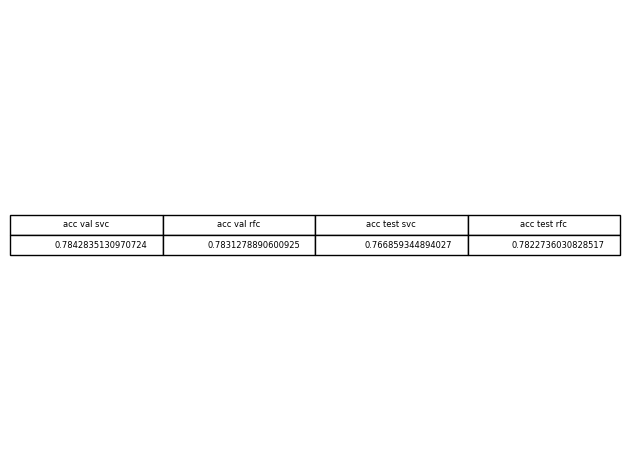

In [84]:
# plot the accuracies of the different settings as table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText = [[max_acc_val_svc, max_acc_val_rfc, acc_test_svc, acc_test_rfc]], 
        colLabels = ['acc val svc', 'acc val rfc', 'acc test svc', 'acc test rfc'],
        loc='center')

fig.tight_layout()
plt.show()

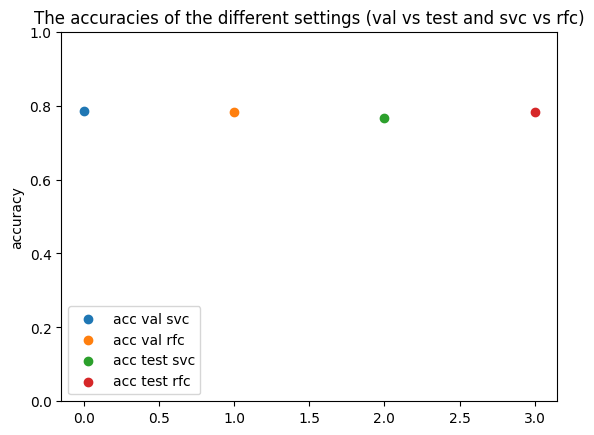

In [92]:
# plot the accuracies of the different settings as scatter plot
fig, ax = plt.subplots()
y_values = [max_acc_val_svc, max_acc_val_rfc, acc_test_svc, acc_test_rfc]
labels = ['acc val svc', 'acc val rfc', 'acc test svc', 'acc test rfc']

for i, (y_value, label) in enumerate(zip(y_values, labels)):
    plt.scatter(i, y_value, label=label)
plt.title('The accuracies of the different settings (val vs test and svc vs rfc)')
plt.ylabel('accuracy')   
plt.legend()
plt.ylim(0,1)
plt.show()

The test accuracies are not significant worse than the validation accuracies. They are a bit lower. In general, the test data is completely unseen data and it differs more from the validation set, and the validation set is pretty similar to the train data. The most important factors are good values for the hyperparameters and enough training data. 

In [93]:
# END EVALUATION, REPORTING RESULTS AND DISCUSSION------------------------------------------------------------------

In [97]:
# START CONFUSION MATRIX--------------------------------------------------------------------------------------------

In [96]:
rfc = RandomForestClassifier(n_estimators=500).fit(train_data, train_labels)
preds = rfc.predict(val_data)
print('labels: ', val_labels)
print('preds: ', preds)
print(confusion_matrix(val_labels, preds.astype('int')))

labels:  [9 1 4 ... 3 0 9]
preds:  [9 1 4 ... 3 0 9]
[[156   6   2  32   7   2   0   0   0  43]
 [ 27 177   3  16  20   1   0   0   3  49]
 [  2   1 123   1   2   0   0   0   1  10]
 [  9   3   1 378  14   3   0   1   2   9]
 [  5  10   0   7 608   0   0   0   6  29]
 [ 11   8   0  30   6  20   0   0   0  38]
 [  3   1   0   6   4   0   1   0   0  13]
 [  3   3   0   7   9   0   0   9   0   7]
 [  0   0   2   6   9   0   0   0  81   4]
 [ 20   9   6  13  25   2   0   0   0 471]]


We can observe significant confusions for classes 5, 6, 7 (we do have labels from 0 to 9). In general the values on the diagonal should be significantly higher than the ones that are off-diagonal to have a good classifier. In our case, this is mostly true. 

In [102]:
# END CONFUSION MATRIX----------------------------------------------------------------------------------------------

In [103]:
# START FEATURE VISUALIZATION---------------------------------------------------------------------------------------

In [98]:
# downprojection
mtr_embedded = TSNE(n_components=2).fit_transform(bm25_mtr_test)
print(mtr_embedded.shape)

(2595, 2)


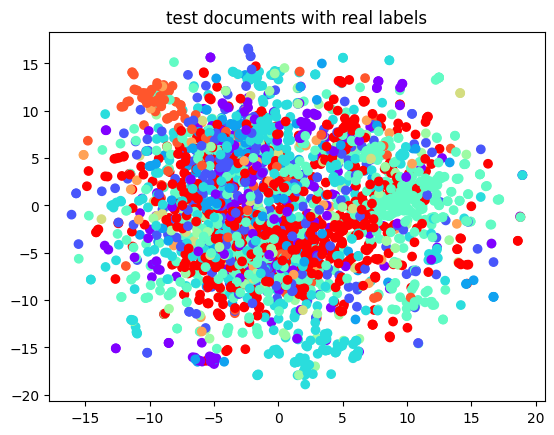

In [100]:
# plot the feature vectors with the real labels
colormap = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.scatter(mtr_embedded[:, 0], mtr_embedded[:, 1], c=colormap[np.array(test_labels).astype('int')])
plt.title('test documents with real labels')
plt.show()

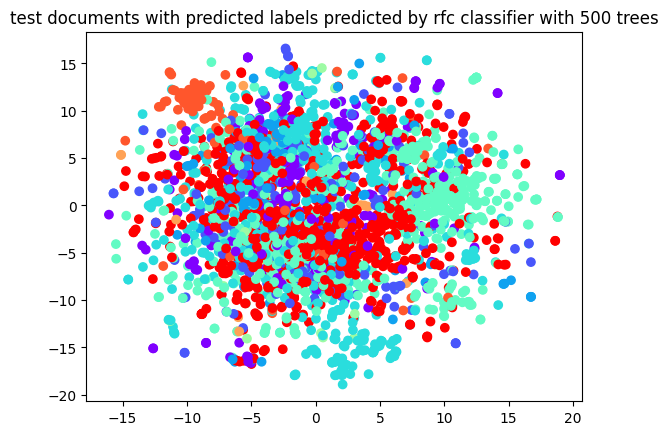

In [101]:
# plot the feature vectors with the predicted labels
rfc = RandomForestClassifier(n_estimators=500).fit(train_data, train_labels)
preds = rfc.predict(test_data)
colormap = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.scatter(mtr_embedded[:, 0], mtr_embedded[:, 1], c=colormap[np.array(preds).astype('int')])
plt.title('test documents with predicted labels predicted by rfc classifier with 500 trees')
plt.show()

The two plots are pretty similar besides some small misclassifications. The misclassifications do mainly happen when the feature vectors that do belong to different classes are pretty similar.

In [ ]:
# END FEATURE VISUALIZATION-----------------------------------------------------------------------------------------

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

In [ ]:
# START LOGISTIC REGRESSION-----------------------------------------------------------------------------------------

In [26]:
from sklearn.linear_model import LogisticRegression 

In [31]:
tf_idf_mtr_train.shape

#smaller_word_dict, tokens_per_text_train

(12110, 951)

In [ ]:
log_regr = LogisticRegression()

log_regr.fit(tf_idf_mtr_train, train_labels)
#pred_lr = log_regr.predict(tf_idf_mtr_val)
token_importances = {}
for cl in log_regr.classes_:
    token_imp_unsorted = {token: coefficient for token, coefficient in zip(smaller_word_dict,log_regr.coef_[cl])}
    token_importances[cl] = dict(sorted(token_imp_unsorted.items(), key=lambda item: item[1], reverse=True)[:20])
    #token_importances_df = pd.DataFrame(token_importances[cl])
    #print(f"Class {cl}:")
    #disp(token_importances_df)

token_importances_df = pd.DataFrame(token_importances)

In [ ]:
# END LOGISTIC REGRESSION; DISPLAY OF TOKEN IMPORTANCES------------------------------------------------------

In [43]:
#Here we see token importances of the top 20 tokens per each of the 10 classes (columns) (sorted in descending order top to bottom;
#NaN signifies that a token is not in the top 20 tokens of the corresponding class.

pd.set_option('display.max_rows', None)
token_importances_df


,0,1,2,3,4,5,6,7,8,9
shelter,1.154055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house,0.995919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home,0.652104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agriculture,0.518444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
harvest,0.491354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production,0.456950,NaN,NaN,0.335562,NaN,NaN,NaN,NaN,NaN,NaN
including,0.454775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
documented,0.433742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crop,0.432690,NaN,NaN,0.517571,NaN,0.525775,NaN,NaN,NaN,NaN
hundred,0.410056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
log_regr.coef_.shape

(10, 951)